In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

import sys
sys.path.append('C:/Users/faisa\Desktop/DataSciencePurwadhika/Modul2')
import function as fnc

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 50)

<h1><center>Supermarket Customers</center></h1>

**People**
<br>`ID`: Customer's unique identifier
<br>`Year_Birth`: Customer's birth year
<br>`Education`: Customer's education level
<br>`Marital_Status`: Customer's marital status
<br>`Income`: Customer's yearly household income
<br>`Kidhome`: Number of children in customer's household (a young human being below the age of puberty or below the legal age of majority) (a son or daughter of any age.)
<br>`Teenhome`: Number of teenagers in customer's household (a person aged between 13 and 19 years)
<br>`Dt_Customer`: Date of customer's enrollment with the company
<br>`Recency`: Number of days since customer's last purchase (jumlah hari sejak terakhir customer membeli sesuatu)
<br>`Complain`: 1 if the customer complained in the last 2 years, 0 otherwise (1 jika komplain dalam periode waktu 2 tahun ke belakang)

**Products**
<br>`MntWines`: Amount spent on wine in last 2 years
<br>`MntFruits`: Amount spent on fruits in last 2 years
<br>`MntMeatProducts`: Amount spent on meat in last 2 years
<br>`MntFishProducts`: Amount spent on fish in last 2 years
<br>`MntSweetProducts`: Amount spent on sweets in last 2 years
<br>`MntGoldProds`: Amount spent on gold in last 2 years

**Promotion**
<br>`NumDealsPurchases`: Number of purchases made with a discount
<br>`AcceptedCmp1`: 1 if the customer accepted the offer in the 1st campaign, 0 otherwise
<br>`AcceptedCmp2`: 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise
<br>`AcceptedCmp3`: 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise
<br>`AcceptedCmp4`: 1 if the customer accepted the offer in the 4th campaign, 0 otherwise
<br>`AcceptedCmp5`: 1 if the customer accepted the offer in the 5th campaign, 0 otherwise
<br>`Response`: 1 if the customer accepted the offer in the last campaign, 0 otherwise

**Place**
<br>`NumWebPurchases`: Number of purchases made through the company’s website
<br>`NumCatalogPurchases`: Number of purchases made using a catalog
<br>`NumStorePurchases`: Number of purchases made directly in stores
<br>`NumWebVisitsMonth`: Number of visits to the company’s website in the last month

In [2]:
df = pd.read_csv(r'C:\Users\faisa\Desktop\DataSciencePurwadhika\Modul2\CapstonProjectModul2\data\raw\Supermarket Customers.csv', delimiter='\t')
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


In [3]:
# number of rows dan columns
df.shape

(2240, 29)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
# describe numerical type
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [6]:
# describe non-numerical type
df.describe(include='object')

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [7]:
# check the quality of DataFrame
fnc.qualitydf(df)

,columns,data_type,null_value(%),n_unique,zero_value,neg_value,sample_unique
0,ID,int64,0.000000,2240,True,False,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,int64,0.000000,59,False,False,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,object,0.000000,5,False,False,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,object,0.000000,8,False,False,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,float64,1.071429,1974,False,False,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,int64,0.000000,3,True,False,"[0, 1, 2]"
6,Teenhome,int64,0.000000,3,True,False,"[0, 1, 2]"
7,Dt_Customer,object,0.000000,663,False,False,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 03-11-2012, 08-08-2012, 06-01-2013, 23-12-2012, 11-01-2014, 18-03-2013, 02-01-2013, 27-05-2013, 20-02-2013, 31-05-2013, 22-11-2013, 22-05-2014, 11-05-2013, 29-10-2012, 29-08-2013, 31-12-2013, 02-09-2013, 11-02-2014, 01-02-2013, 29-04-2013, 12-03-2013, 05-11-2013, 02-10-2013, 28-06-2014, 09-11-2012, 24-05-2013, 01-01-2014, 08-11-2012, 12-05-2014, 11-08-2012, 07-06-2014, 12-06-2013, 19-11-2012, 02-04-2013, 28-04-2014, 17-06-2013, 03-03-2014, 04-07-2013, 07-09-2012, 18-02-2013, 11-06-2013, 06-12-2013, 21-05-2013, 11-05-2014, 19-03-2014, 27-09-2013, 08-04-2013, 11-09-2012, 14-09-2012, 17-03-2013, 05-04-2013, 30-04-2014, 19-12-2012, 27-08-2012, 12-10-2012, 04-09-2013, 29-08-2012, 23-06-2013, 03-07-2013, 25-02-2014, 11-08-2013, 16-07-2013, 28-05-2014, 21-01-2014, 27-05-2014, 23-11-2013, 23-03-2014, 24-05-2014, 22-11-2012, 11-04-2013, 01-12-2013, 20-06-2013, 23-07-2013, 30-03-2014, 20-04-2013, 17-05-2013, 08-05-2014, 10-12-2013, 24-09-2013, 02-02-2013, 07-12-2012, 02-11-2013, 10-11-2012, 25-06-2014, ...]"
8,Recency,int64,0.000000,100,True,False,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 25, 40, 9, 87, 5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81,

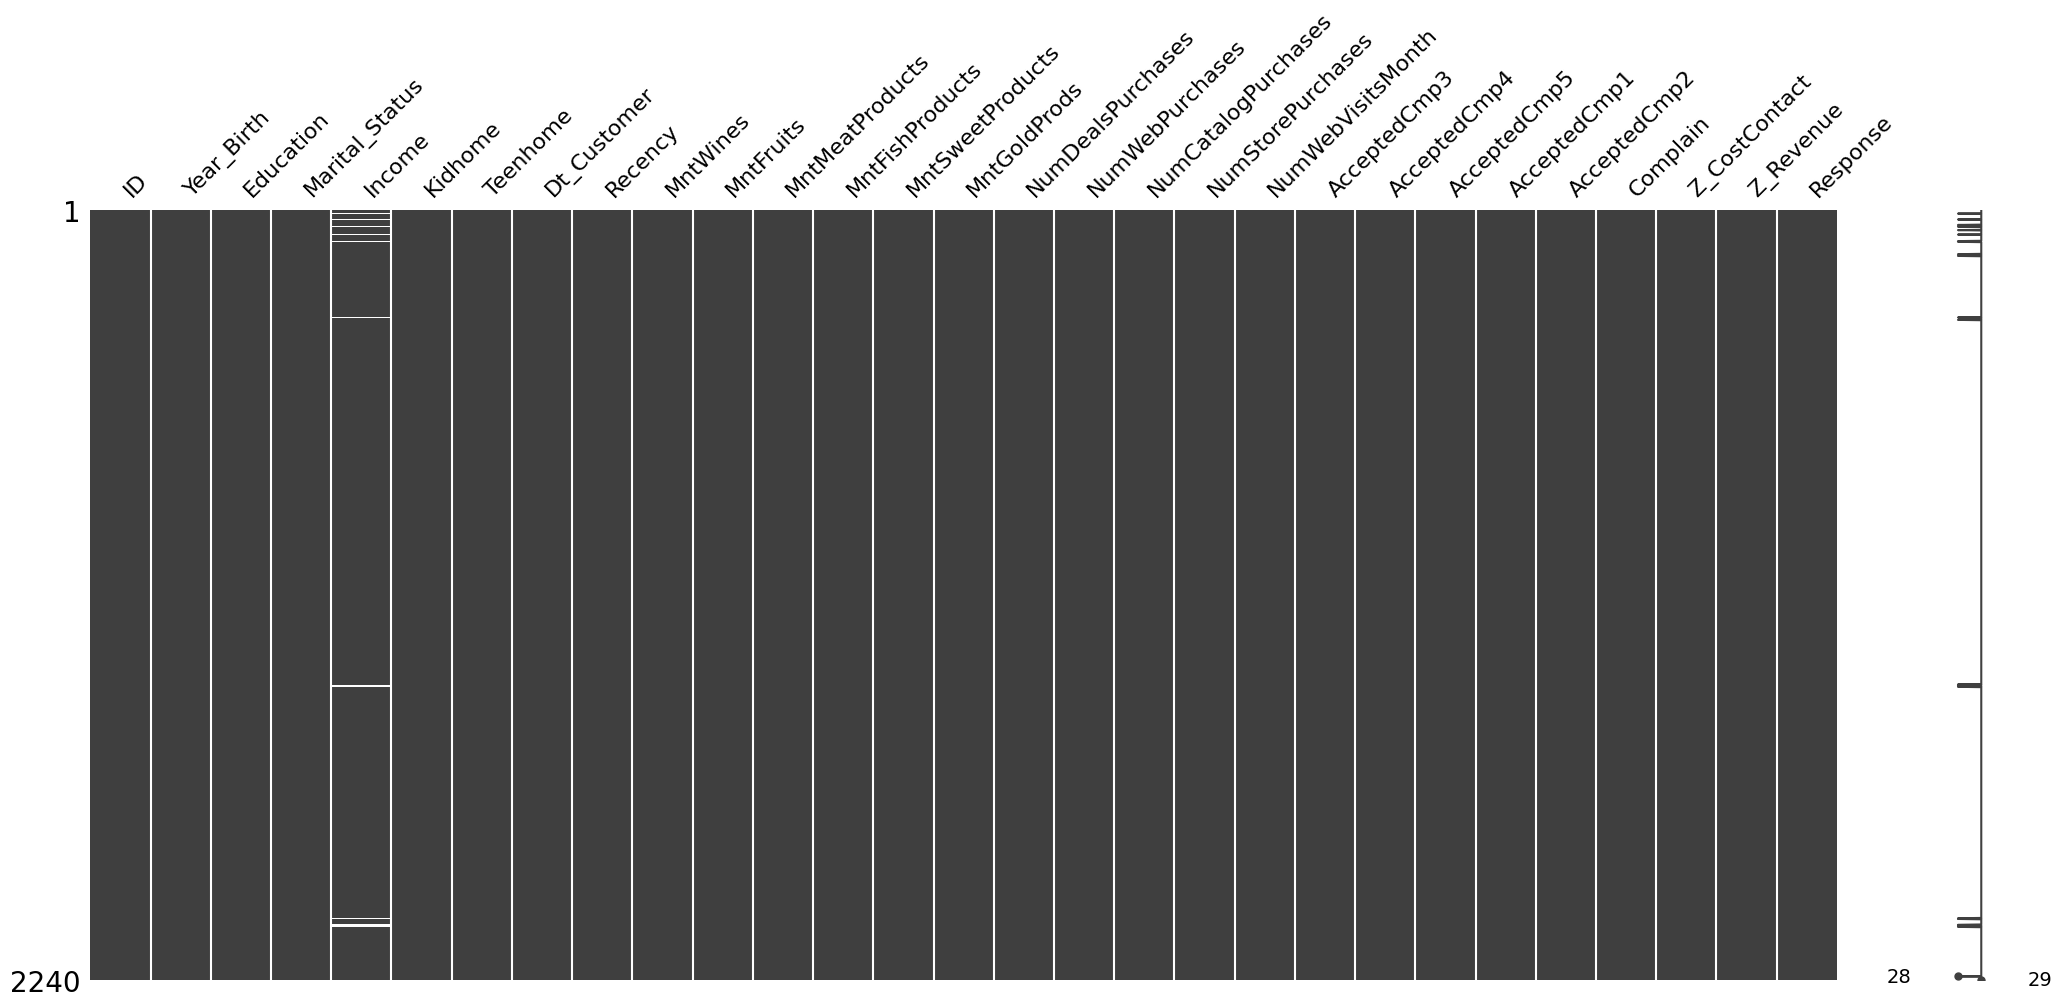

In [8]:
# check missing value with matrix graph
msno.matrix(df);

insight:
- There are 1% missing values in Income column

> ### Handling rearanged the columns based on supermarket_customer.pdf
- in order to make it easy to read

In [9]:
# rearanged columns based on Supermarket Customers Data Dictionary_2.pdf
rearangedColumns = [
        'ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'Complain', \
        'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', \
        'NumDealsPurchases', 'AcceptedCmp1','AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', \
        'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', \
        'Z_CostContact', 'Z_Revenue'
        ]

In [10]:
df = df[rearangedColumns]
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,0,635,88,546,172,88,88,3,0,0,0,0,0,1,8,10,4,7,3,11
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,0,11,1,6,2,1,6,2,0,0,0,0,0,0,1,1,2,5,3,11
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,0,426,49,127,111,21,42,1,0,0,0,0,0,0,8,2,10,4,3,11
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,0,11,4,20,10,3,5,2,0,0,0,0,0,0,2,0,4,6,3,11
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,0,173,43,118,46,27,15,5,0,0,0,0,0,0,5,3,6,5,3,11


#### Handling data type in Dt_Customer column

In [11]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['Dt_Customer'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2240 entries, 0 to 2239
Series name: Dt_Customer
Non-Null Count  Dtype         
--------------  -----         
2240 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 17.6 KB


> ### Handling zero value in ID column
- with the assumption that values of 0 can be read as null values

In [12]:
# there is 1 row with zero value in ID column
df.loc[df['ID'] == 0]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue
214,0,1985,Graduation,Married,70951.0,0,0,2013-05-04,66,0,239,10,554,254,87,54,1,0,0,0,0,0,0,3,4,9,1,3,11


In [13]:
# generates random integer number with low equal to min ID and high equal to max ID
id = [id for id in df['ID']]
np.random.seed(22)
id_0 = 0
while True:
    trial = np.random.randint(low=1, high=11191)
    if trial not in id:
        id_0 += trial
        break
    else:
        continue

# replace zero value with random number
df['ID'] = df['ID'].replace(0,id_0)
df.loc[df['ID'] == id_0]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue
214,11126,1985,Graduation,Married,70951.0,0,0,2013-05-04,66,0,239,10,554,254,87,54,1,0,0,0,0,0,0,3,4,9,1,3,11


In [14]:
# ID 0 has been replaced with 11126
df.query("ID == 0")

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue


> ### Handling missing values in Income column

<br> 1. According to the this articles [Married people earn more than single individuals. Here’s why.](https://bigthink.com/smart-skills/married-wage-gap/#:~:text=That%20married%20people%20make%20more,to%20be%20greater%20for%20men.) and [Marriage and Money: The Effect of Marital Status on Attitudes Toward Pay and Finances](https://www.researchgate.net/publication/249690568_Marriage_and_Money_The_Effect_of_Marital_Status_on_Attitudes_Toward_Pay_and_Finances#:~:text=Research%20has%20shown%20that%20marital,attitudes%20toward%20pay%20and%20finances.), marital status and education level affect income
<br> 2. According to the this article [Born to run behind? Persisting birth month effects on earnings](https://www.sciencedirect.com/science/article/pii/S0927537116302196), year_birth affect income

<br> **But, we have to validate by looking at how the correlation and significancy between those columns using phik correlation.**

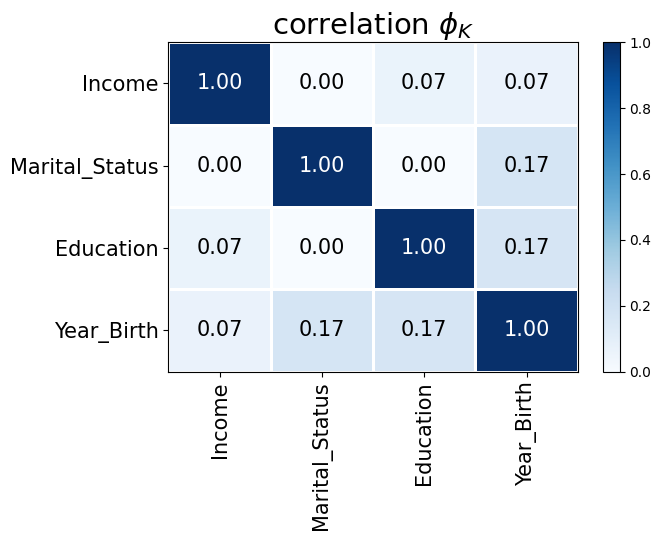

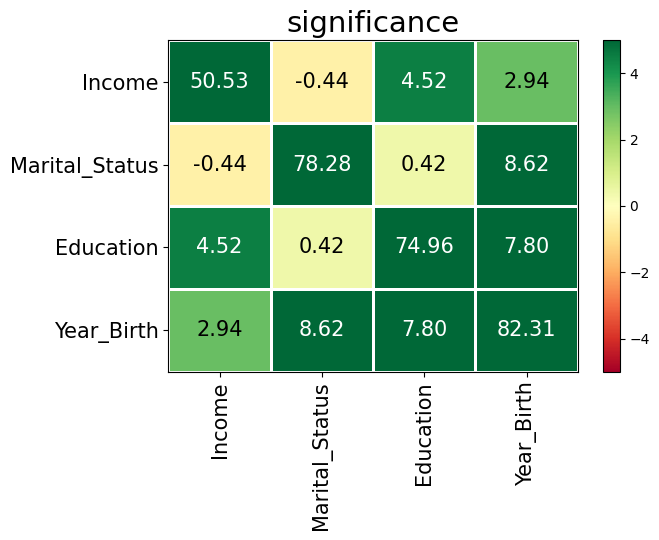

In [15]:
# correlation between Year_Birth, Education, Marital Status, and Income using phik correlation package

# import module
import phik
from phik.report import plot_correlation_matrix
from phik import report

# phik correlation
phik_overview = df[['Year_Birth','Education', 'Marital_Status', 'Income']].phik_matrix(interval_cols=['Year_Birth', 'Income'])

plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map='Blues', title=r'correlation $\phi_K$', fontsize_factor=1.5,
                        figsize=(7,5.5))

# significance between those columns
significance_overview = df[['Year_Birth','Education', 'Marital_Status', 'Income']].significance_matrix(interval_cols=['Year_Birth', 'Income'])

plot_correlation_matrix(significance_overview.fillna(0).values, x_labels=significance_overview.columns, 
                        y_labels=significance_overview.index, vmin=-5, vmax=5, title='significance', 
                        usetex=False, fontsize_factor=1.5, figsize=(7,5.5))

plt.tight_layout()

insight:
<br>- Income is not correlated with marital status and the significance is low
<br>- Income is low correlated with education level, but the significance is high
<br>- Income is low correlated with year_birth, but the significance is high

<br> **So it can be concluded, education level and/or year of birth has an effect on income. Replace NaN value in Income column based on their year birth and/or education level then.**

In [16]:
# check the interval quantile 0, quantile 0.25, quantile 0.5, and quantile 1
df['Year_Birth'].describe()

count    2240.000000
mean     1968.805804
std        11.984069
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

> ### check the income distribution wheater normal distribution or not normal distribution ?

1. Graphical Methods (boxplot and qqplot)

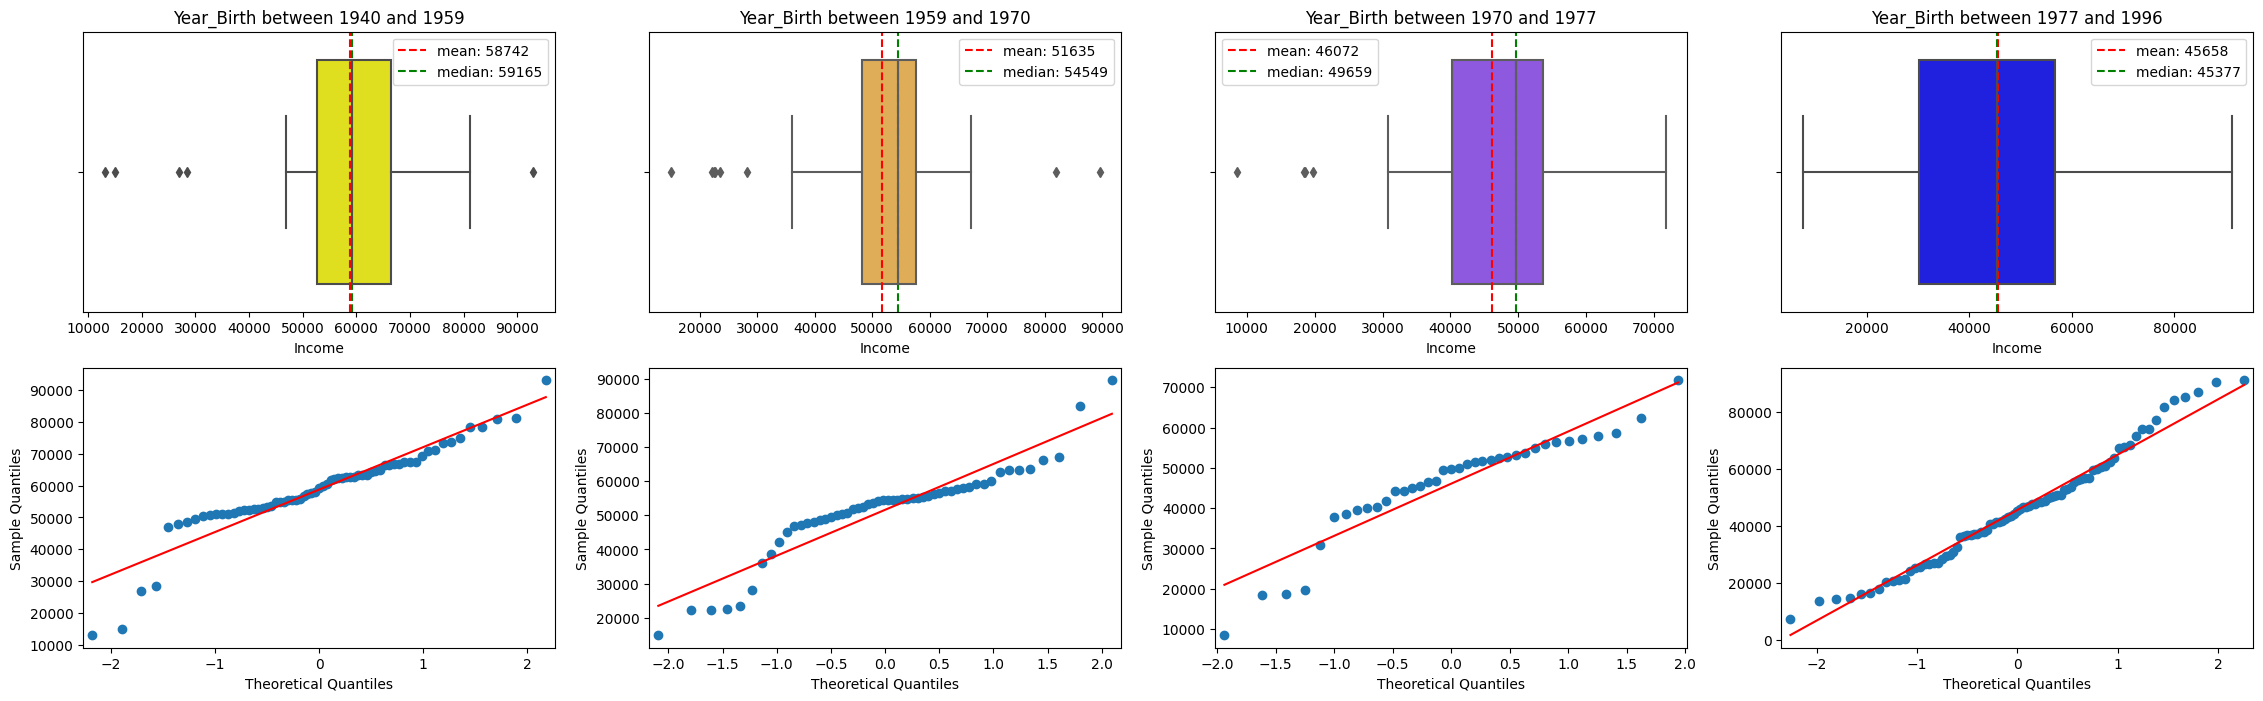

In [17]:
df1 = df.query("Year_Birth >= 1940 and Year_Birth <= 1959").groupby(['Year_Birth','Education']).agg({'Income' : 'mean'}).reset_index() # year_birth between 1940 - 1959 # min s/d q1 (.25)
df2 = df.query("Year_Birth >= 1959 and Year_Birth <= 1970").groupby(['Year_Birth','Education']).agg({'Income' : 'mean'}).reset_index() # year_birth between 1959 - 1970 # q1 (.25) s/d q2 (.5)
df3 = df.query("Year_Birth >= 1970 and Year_Birth <= 1977").groupby(['Year_Birth','Education']).agg({'Income' : 'mean'}).reset_index() # year_birth between 1970 - 1977 # q2 (.5) s/d q3 (.75)
df4 = df.query("Year_Birth >= 1977 and Year_Birth <= 1996").groupby(['Year_Birth','Education']).agg({'Income' : 'mean'}).reset_index() # year_birth between 1977 - 1996 # q3 (.75) s/d q4 (1)

# modul for qqplot
import statsmodels.api as sm

# Check the distribution with Graphical Methods
fig, ((ax1,ax2,ax3,ax4), (ax5,ax6,ax7,ax8)) = plt.subplots(nrows=2, ncols=4, figsize=(28,8))

axbox = [ax1,ax2,ax3,ax4]
axqq = [ax5,ax6,ax7,ax8]
dflist = [df1,df2,df3,df4]
title = ['Year_Birth between 1940 and 1959', 'Year_Birth between 1959 and 1970', 'Year_Birth between 1970 and 1977','Year_Birth between 1977 and 1996']
color = ['yellow', '#f5b342', '#8a42f5', 'blue']

for i in zip(dflist, axbox, axqq, title, color):
    sns.boxplot(i[0], x='Income', ax=i[1], color=i[4])
    sm.qqplot(i[0]['Income'], line='s', ax=i[2])
    i[1].set_title(i[3])
    i[1].axvline(x=i[0]['Income'].mean(), color='red', label=f"mean: {round(i[0]['Income'].mean())}", linestyle='--')
    i[1].axvline(x=i[0]['Income'].median(), color='green', label=f"median: {round(i[0]['Income'].median())}", linestyle='--')
    i[1].legend()

insight:
- all of graphs are not normal distribution and positively skewed. So, we can use Median to fill NaN values in Income column

2. Frequentist Test: Shapiro Wilk Test

In [18]:
from scipy.stats import shapiro

# list of df based on year_birth
dflist1 = ['df1','df2','df3','df4']

# check the distribution
for i in dflist1:
    # pvalue
    stats, pvalue = shapiro(eval(i)['Income'])
    # check the pvalue
    if pvalue > 0.05:
        print(f"pvalue: {pvalue}. So, income in {i} has normal distribution")
    else:
        print(f"pvalue: {pvalue}. So, income in {i} has NOT normal distribution")

pvalue: 0.00011008876754203811. So, income in df1 has NOT normal distribution
pvalue: 0.0001657448010519147. So, income in df2 has NOT normal distribution
pvalue: 0.003338587936013937. So, income in df3 has NOT normal distribution
pvalue: 0.14042145013809204. So, income in df4 has normal distribution


insight:
- based on shapiro test, all income column in all DataFrames are not normal distributed, besides df4
- So, we can use Median to fill NaN values in Income column, except if year_birth and education belongs to df4

In [19]:
# DataFrame income is NaN
df_income_nan = df.query("Income.isna()").reset_index(drop=True)
df_income_nan

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue
0,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,0,5,5,6,0,2,1,1,0,0,0,0,0,0,1,0,2,7,3,11
1,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,0,5,1,3,3,263,362,0,0,0,0,0,0,0,27,0,0,1,3,11
2,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,0,81,11,50,3,2,39,1,0,0,0,0,0,0,1,3,4,2,3,11
3,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,0,48,5,48,6,10,7,3,0,0,0,0,0,0,2,1,4,6,3,11
4,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,0,11,3,22,2,2,6,2,0,0,0,0,0,0,2,0,3,6,3,11
5,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,0,25,3,43,17,4,17,3,0,0,0,0,0,0,3,0,3,8,3,11
6,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,0,230,42,192,49,37,53,12,0,0,0,0,0,0,7,2,8,9,3,11
7,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,0,7,0,8,2,0,1,1,0,0,0,0,0,0,1,0,2,7,3,11
8,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,0,445,37,359,98,28,18,1,0,0,0,0,0,0,2,4,8,1,3,11
9,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,0,352,0,27,10,0,15,3,0,0,0,0,0,0,6,1,7,6,3,11


In [20]:
# based on Saphiro Test, only df4 which has normal distribution, so we use mean as aggregate in that DataFrame. Otherwise, we use median as aggregate
df1 = df.query("Year_Birth >= 1940 and Year_Birth <= 1959").groupby(['Year_Birth','Education']).agg({'Income' : 'median'}).reset_index()
df2 = df.query("Year_Birth >= 1959 and Year_Birth <= 1970").groupby(['Year_Birth','Education']).agg({'Income' : 'median'}).reset_index()
df3 = df.query("Year_Birth >= 1970 and Year_Birth <= 1977").groupby(['Year_Birth','Education']).agg({'Income' : 'median'}).reset_index()
df4 = df.query("Year_Birth >= 1977 and Year_Birth <= 1996").groupby(['Year_Birth','Education']).agg({'Income' : 'mean'}).reset_index()

# concat all df1, df2, df3, and df4
df_concat = pd.concat([df1,df2,df3,df4], ignore_index=True)

# check all combination between year_birth and education
len1 = 0
for i in df_income_nan.index:
    for j in df_concat.index:
        if df_income_nan.iloc[i][1] == df_concat.iloc[j][0] and df_income_nan.iloc[i][2] == df_concat.iloc[j][1]:
            # print(f"kombinasi ada, yaitu \n{df_income_nan.iloc[i][1]} dan {df_income_nan.iloc[i][2]}\n")
            len1 += 1
            break
        else:
            continue

if len1 == len(df_income_nan):
    print("all combinations exist")
else:
    print("all combinations doesn't exist")

all combinations exist


In [21]:
income_for_nan = []
# fill NaN values with Median based on their year_birth and education
for i in df_income_nan.index:
    for j in df_concat.index:
        if df_income_nan.iloc[i][1] == df_concat.iloc[j][0] and df_income_nan.iloc[i][2] == df_concat.iloc[j][1] :
            income_for_nan.append(df_concat.iloc[j][2])
            break
# income_for_nan        
df_income_nan['Income'] = np.array(income_for_nan)
df_income_nan

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue
0,1994,1983,Graduation,Married,43476.173913,1,0,2013-11-15,11,0,5,5,6,0,2,1,1,0,0,0,0,0,0,1,0,2,7,3,11
1,5255,1986,Graduation,Single,48825.000000,1,0,2013-02-20,19,0,5,1,3,3,263,362,0,0,0,0,0,0,0,27,0,0,1,3,11
2,7281,1959,PhD,Single,53195.500000,0,0,2013-11-05,80,0,81,11,50,3,2,39,1,0,0,0,0,0,0,1,3,4,2,3,11
3,7244,1951,Graduation,Single,55547.000000,2,1,2014-01-01,96,0,48,5,48,6,10,7,3,0,0,0,0,0,0,2,1,4,6,3,11
4,8557,1982,Graduation,Single,49943.900000,1,0,2013-06-17,57,0,11,3,22,2,2,6,2,0,0,0,0,0,0,2,0,3,6,3,11
5,10629,1973,2n Cycle,Married,35688.000000,1,0,2012-09-14,25,0,25,3,43,17,4,17,3,0,0,0,0,0,0,3,0,3,8,3,11
6,8996,1957,PhD,Married,41437.000000,2,1,2012-11-19,4,0,230,42,192,49,37,53,12,0,0,0,0,0,0,7,2,8,9,3,11
7,9235,1957,Graduation,Single,50388.000000,1,1,2014-05-27,45,0,7,0,8,2,0,1,1,0,0,0,0,0,0,1,0,2,7,3,11
8,5798,1973,Master,Together,44051.000000,0,0,2013-11-23,87,0,445,37,359,98,28,18,1,0,0,0,0,0,0,2,4,8,1,3,11
9,8268,1961,PhD,Married,63342.000000,0,1,2013-07-11,23,0,352,0,27,10,0,15,3,0,0,0,0,0,0,6,1,7,6,3,11


In [22]:
# DataFrame which contain Income is NOT NaN values
df_income_not_nan = df.query("~Income.isna()")
df_income_not_nan

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,0,635,88,546,172,88,88,3,0,0,0,0,0,1,8,10,4,7,3,11
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,0,11,1,6,2,1,6,2,0,0,0,0,0,0,1,1,2,5,3,11
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,0,426,49,127,111,21,42,1,0,0,0,0,0,0,8,2,10,4,3,11
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,0,11,4,20,10,3,5,2,0,0,0,0,0,0,2,0,4,6,3,11
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,0,173,43,118,46,27,15,5,0,0,0,0,0,0,5,3,6,5,3,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,0,709,43,182,42,118,247,2,0,0,0,0,0,0,9,3,4,5,3,11
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,0,406,0,30,0,0,8,7,1,0,0,0,0,0,8,2,5,7,3,11
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,0,908,48,217,32,12,24,1,0,0,0,1,0,0,2,3,13,6,3,11
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,0,428,30,214,80,30,61,2,0,0,0,0,0,0,6,5,10,3,3,11


In [23]:
# concat all data that is income nan and income NOT nan
df = pd.concat([df_income_not_nan, df_income_nan], ignore_index=True)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue
0,5524,1957,Graduation,Single,58138.000000,0,0,2012-09-04,58,0,635,88,546,172,88,88,3,0,0,0,0,0,1,8,10,4,7,3,11
1,2174,1954,Graduation,Single,46344.000000,1,1,2014-03-08,38,0,11,1,6,2,1,6,2,0,0,0,0,0,0,1,1,2,5,3,11
2,4141,1965,Graduation,Together,71613.000000,0,0,2013-08-21,26,0,426,49,127,111,21,42,1,0,0,0,0,0,0,8,2,10,4,3,11
3,6182,1984,Graduation,Together,26646.000000,1,0,2014-02-10,26,0,11,4,20,10,3,5,2,0,0,0,0,0,0,2,0,4,6,3,11
4,5324,1981,PhD,Married,58293.000000,1,0,2014-01-19,94,0,173,43,118,46,27,15,5,0,0,0,0,0,0,5,3,6,5,3,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,5079,1971,Graduation,Married,42075.500000,1,1,2013-03-03,82,0,71,1,16,0,0,9,4,0,0,0,0,0,0,2,1,3,8,3,11
2236,10339,1954,Master,Together,52884.500000,0,1,2013-06-23,83,0,161,0,22,0,0,24,2,0,0,0,0,0,0,4,1,4,6,3,11
2237,3117,1955,Graduation,Single,59925.000000,0,1,2013-10-18,95,0,264,0,21,12,6,147,3,0,0,0,0,0,0,6,1,5,7,3,11
2238,5250,1943,Master,Widow,71335.500000,0,0,2013-10-30,75,0,532,126,490,164,126,126,1,0,0,0,0,1,1,5,5,11,1,3,11


In [24]:
# Income has been replaced
df.query("Income.isna()")

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue


> ### Handling outliers data

1. Numerical: Year_Birth, Income, Kidhome, Teenhome, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth

2. Categorical:
    - ordinal : Education
    - nominal : Marital_Status, Complain, AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, Response

3. Datetime
    Dt_Customer

4. Unknown : Z_CostContact, Z_Revenue

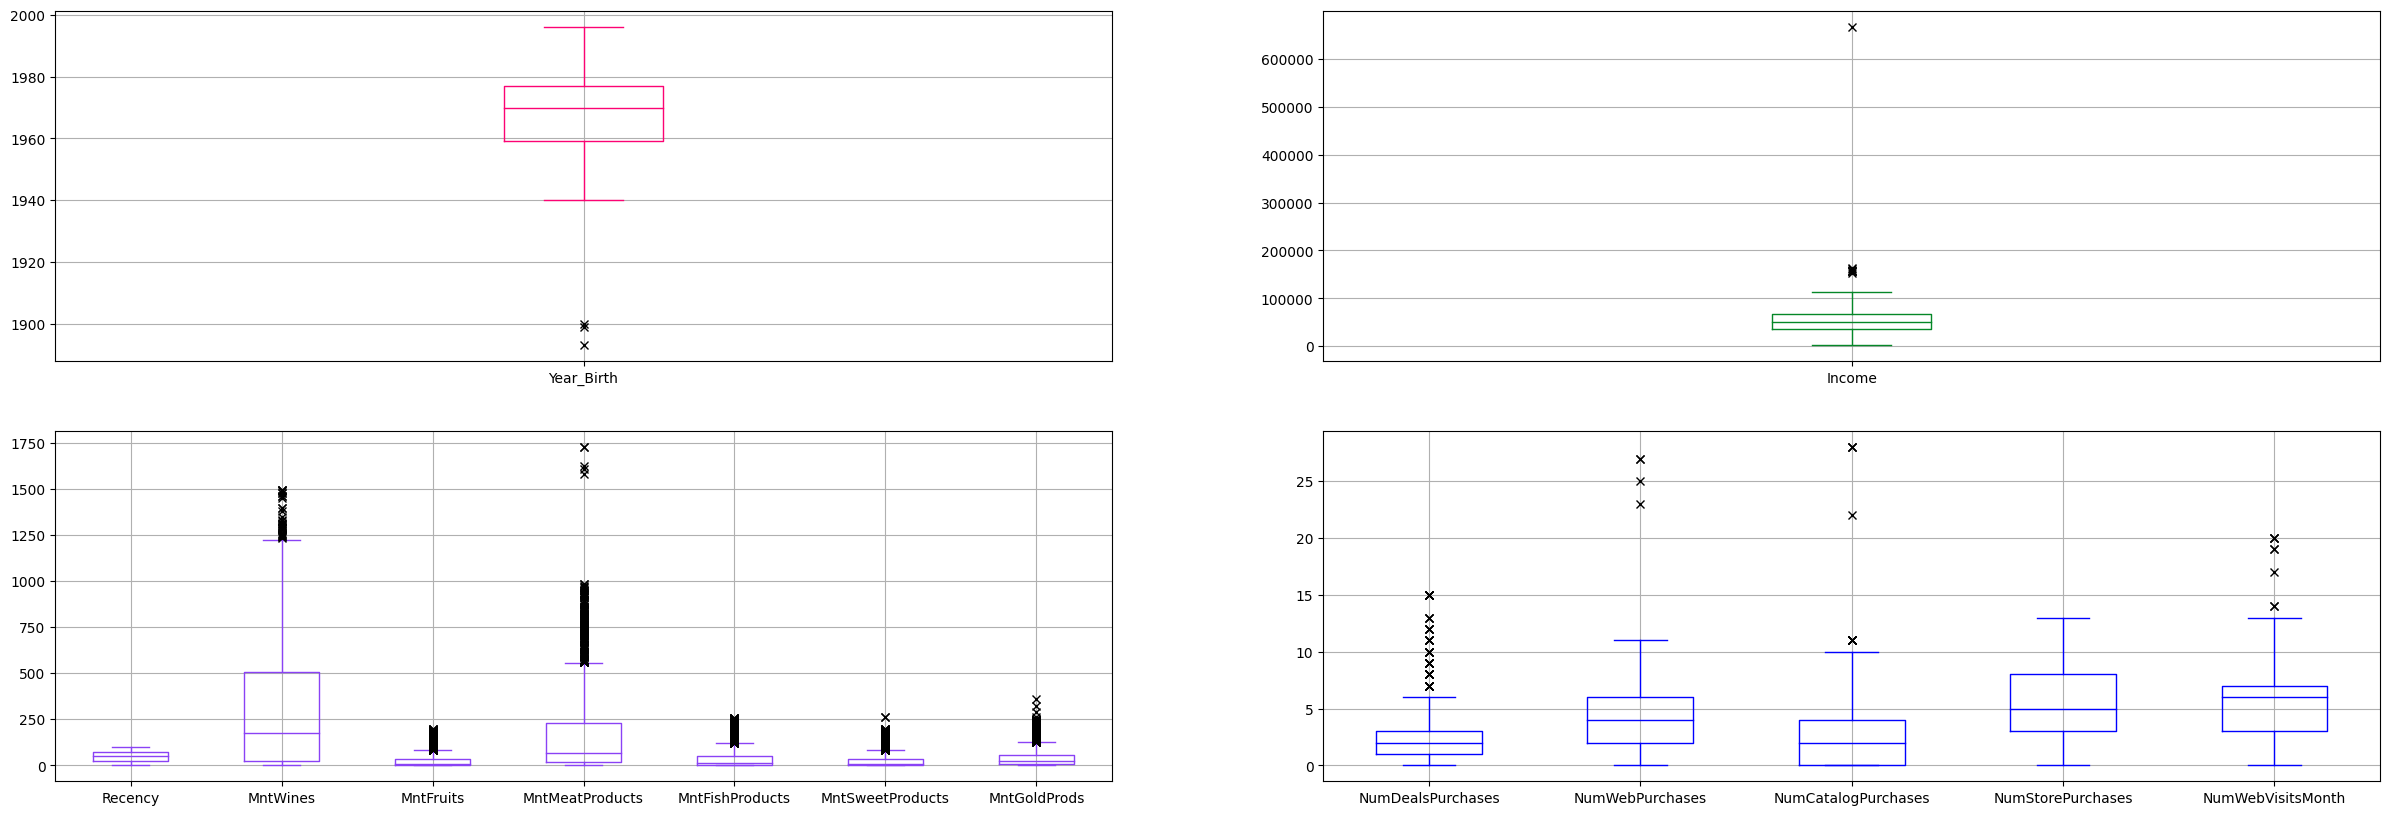

In [27]:
df_num1 = df[['Year_Birth']]
df_num2 = df[['Income']]
df_num3 = df[['Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]
df_num4 = df[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']]

# plot boxplot
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(30,10))

rows1 = [ax1,ax2]
rows2 = [ax3,ax4]
dflist1 = [df_num1, df_num2]
dflist2 = [df_num3, df_num4]
color1 = ['#fc0373', '#058728']
color2 = ['#8a42f5', 'blue']

for i in zip(rows1, rows2, dflist1, dflist2, color1, color2):
    i[2].boxplot(ax=i[0], color=i[-2], flierprops={"marker": "x"})
    i[3].boxplot(ax=i[1], color=i[-1], flierprops={"marker": "x"})

insight:
- There are outliers in the Year_Birth column, for outliers in other columns it's not a problem because they still make sense.

In [28]:
# IQR (Q3 - Q1)
q3 = int(df['Year_Birth'].quantile([0.75]).values)
q1 = int(df['Year_Birth'].quantile([0.25]).values)
iqr = q3 - q1

# lower bound
lowerbound = q1 - (1.5*iqr)

# check how many percents outliers data in Year_Birth column
print(f"There are {round((len(df.loc[df['Year_Birth'] < lowerbound]) / len(df)),5) * 100}% outliers data")

There are 0.134% outliers data


In [30]:
# locate the outlier data in Year_Birth column
df.loc[df['Year_Birth'] < lowerbound]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue
181,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,1,15,6,8,7,4,25,1,0,0,0,0,0,0,2,1,2,5,3,11
228,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,0,8,0,5,7,0,2,1,0,0,0,0,0,0,1,0,2,4,3,11
326,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,0,755,144,562,104,64,224,1,0,0,0,0,1,0,4,6,4,1,3,11


In [60]:
# quantile of Income
quantile_income = fnc.checkquantiles(df,'Income')

# quantile of Year_Birth
quantile_year_birth = fnc.checkquantiles(df,'Year_Birth')

# mode of Year_Birth based on its quantile
mode1 = df.loc[(df['Year_Birth'] >= quantile_year_birth[0]) & (df['Year_Birth'] <= quantile_year_birth[1])]['Year_Birth'].mode()[0] # mode between min - q1
mode2 = df.loc[(df['Year_Birth'] >= quantile_year_birth[1]) & (df['Year_Birth'] <= quantile_year_birth[2])]['Year_Birth'].mode()[0] # mode between q1 - q2
mode3 = df.loc[(df['Year_Birth'] >= quantile_year_birth[2]) & (df['Year_Birth'] <= quantile_year_birth[3])]['Year_Birth'].mode()[0] # mode between q2 - q3
mode4 = df.loc[(df['Year_Birth'] >= quantile_year_birth[3]) & (df['Year_Birth'] <= quantile_year_birth[4])]['Year_Birth'].mode()[0] # mode between q3 - q4

# check where the income outliers are located based on its quantile, then apply year_birth with Year_Birth's mode based on income's quantile
def new_year_birth(df):
    if df['Year_Birth'] < lowerbound:
        if df['Income'] <= quantile_income[1] and df['Income'] >= quantile_income[0]:
            return mode1
        elif df['Income'] <= quantile_income[2] and df['Income'] >= quantile_income[1]:
            return mode2
        elif df['Income'] <= quantile_income[3] and df['Income'] >= quantile_income[2]:
            return mode3
        else:
            return mode4
    else:
        return df['Year_Birth']

df['Year_Birth'] = df.apply(new_year_birth, axis=1)

In [63]:
# ensure year_birth outliers have changed
df.query("ID == 7829 or ID == 11004 or ID == 1150")

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue
181,7829,1970,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,1,15,6,8,7,4,25,1,0,0,0,0,0,0,2,1,2,5,3,11
228,11004,1976,2n Cycle,Single,60182.0,0,1,2014-05-17,23,0,8,0,5,7,0,2,1,0,0,0,0,0,0,1,0,2,4,3,11
326,1150,1978,PhD,Together,83532.0,0,0,2013-09-26,36,0,755,144,562,104,64,224,1,0,0,0,0,1,0,4,6,4,1,3,11


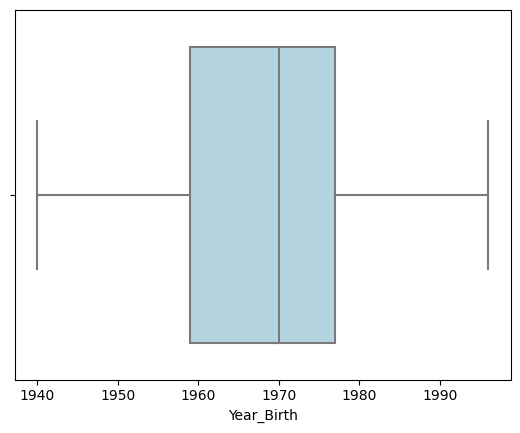

In [70]:
# ensure there is no outlier in year_birth column with boxplot
sns.boxplot(df, x='Year_Birth', color='lightblue');

> ### Handling duplicated data

In [72]:
print(f"Number of duplicated data : {df[df.duplicated()].shape[0]} rows")
df[df.duplicated()]

Number of duplicated data : 0 rows


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue
